# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Initialising the RNN

In [17]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [18]:
rnn.add(LSTM(units=30, return_sequences=True, dropout=0.2, input_shape=(X_train.shape[1],1)))

### Adding a second LSTM layer and some Dropout regularisation

In [19]:
rnn.add(LSTM(units=20, return_sequences=True, dropout=0.1))

### Adding a third LSTM layer and some Dropout regularisation

In [20]:
rnn.add(LSTM(units=20, return_sequences=True, dropout=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [21]:
rnn.add(LSTM(units=30, return_sequences=False, dropout=0.1))

### Adding the output layer

In [22]:
rnn.add(Dense(units=1))

### Compiling the RNN

In [23]:
rnn.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
rnn.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 3s 79ms/step - loss: 0.0569
Epoch 2/50
38/38 [==============================] - 3s 84ms/step - loss: 0.0059
Epoch 3/50
38/38 [==============================] - 3s 84ms/step - loss: 0.0051
Epoch 4/50
38/38 [==============================] - 3s 79ms/step - loss: 0.0051
Epoch 5/50
38/38 [==============================] - 3s 72ms/step - loss: 0.0051
Epoch 6/50
38/38 [==============================] - 3s 73ms/step - loss: 0.0056
Epoch 7/50
38/38 [==============================] - 3s 73ms/step - loss: 0.0049
Epoch 8/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0052
Epoch 9/50
38/38 [==============================] - 3s 74ms/step - loss: 0.0048
Epoch 10/50
38/38 [==============================] - 3s 74ms/step - loss: 0.0044
Epoch 11/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0055
Epoch 12/50
38/38 [==============================] - 3s 75ms/step - loss: 0.0047
Epoch 13/50
38/38 [==================

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [25]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [29]:
dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predictions = rnn.predict(X_test)
predictions = sc.inverse_transform(predictions)

### Visualising the results

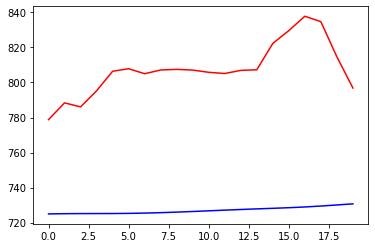

In [30]:
plt.plot(real_stock_price,color='red', label='real')
plt.plot(predictions,color='blue', label='predictions')
plt.show()
